# DL based Language Models for Handwritten Recognised Text Accuracy Enhancement (Error analysis)

##Importing essential libraries


In [ ]:
!apt update
!apt install enchant --fix-missing
!apt install -qq enchant
!pip install pyenchant
import nltk
nltk.download('punkt')
!pip install pybind11
!pip install fastwer
!pip install pytesseract
!sudo apt install tesseract-ocr

import nltk
import re
import pandas as pd
import cv2
import pytesseract
import fastwer
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display
import random
from random import seed
import string


Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ Packages [77.6 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:8 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:11 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,150 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,334 kB]
Hi

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.3/222.3 kB 5.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fastwer: filename=fastwer-0.1.3-cp310-cp310-linux_x86_64.whl size=884139 sha256=701912d1c8793c8a234f1c06f24b9c95bdeb5aedd96721ab6ddcce684bb662ad
  Stored in directory: /root/.cache/pip/wheels/99/b5/22/f6edc9a914bf3b54ebc55e258e2f9aa2297908d85799de228f
Successfully built fastwer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-o

In [ ]:
df_c4_1 = pd.read_csv('/content/drive/MyDrive/Project_document_recognition/Updated_target_marian_errors.csv')

FileNotFoundError: ignored

In [ ]:
df_c4

,S,target_text,input_text,MarianMT,BART
0,0,Good luck on your new start !,Good luck in our new start !,‚ñÅGood luck in our new start!,Good luck in our new start!
1,1,My teacher is going to move to change his job .,My teacher is went to moved change his job .,My teacher went to moved to‚ñÅchange his job.,My teacher is went to moved change his job.
2,2,He is a so nice guy and taught me English very...,He is a nice guy and teach me English very ki...,He is a nice guy and teach me‚ñÅEnglish very k...,He is a nice guy and teach me English very ki...
3,3,And he took in my favorite subjects like soccer .,And he take in my favourite subject like socerr .,And he take in my favourite subject like socerr.,And he take in my favourite subject like socerr.
4,4,"Actually , he was the one who let me know abou...","Actually , who let me know about Lang uage is ...","Actually,‚ñÅwho let me know about Lang uage is...","Actually, who let me know about Lang uage is he."
...,...,...,...,...,...
1037508,1037508,"As the date had been promised at noon , I went...","As the date has been promised in noon , I gone...","As the date has been promised in noon, I gone ...","As the date has been promised at noon, I went ..."
1037509,1037509,11 a . m . and toward the meeting place by sub...,11 a m and toward the meet place by sub way .,11 a m and toward the meet‚ñÅplace by sub way.,11 a m. and toward the meet place by sub way.
1037510,1037510,"On the way , I got a mail from her .","On the way , I get an mail from her .","On the way, I get an mail from her.","On the way, I got an email from her."
1037511,1037511,she said she want to change the meeting time t...,"It said , she went to made the meeting time in...","It said, she went to made the meeting time in ...","It said, she went to make the meeting time in ..."


## Error analysis code



In [ ]:
!apt update
!apt install enchant --fix-missing
!apt install -qq enchant
!pip install pyenchant

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease [18.1 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,027 kB]
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,314 kB]
Get:14 h

In [ ]:
import enchant
d = enchant.Dict("en_US")
d.check('broadcasted')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from pandas.tseries.offsets import YearEnd
from nltk.tokenize import word_tokenize
import enchant
import re

d = enchant.Dict("en_US")

def Errortype(df_c4,x,y,z): #receive data_frame, Correct sentence, Incorrect sentence and column to enter the error type
 corr=[]   #correct sentence array
 incorr=[] #incorrect sentence array
 words=[]
 t=0
 for i in range(len(df_c4[x])): #range(len(df_c4['correct_text'])):
  p=0
  corr=word_tokenize(str(df_c4[x][i])) #the correct sentence
  corr1=corr
  incorr=word_tokenize(str(df_c4[y][i])) #the incorrect sentence
  incorr1=incorr
  words=[]

  for j in range(len(incorr)):
   k=0
   for q in range(len(corr)):
     if corr[q]==incorr[j]:     #if the incorrect sentence word match with the correct sentence word
       corr[q]=0    #replace the matching word with 0
       incorr[j]=0
       break
     else:
       k+=1
   if k==len(corr):  #if the number of words that has not matched in the incorr is equal to the number of words in correct statement
    p=1
    words.append(incorr[j])

  for t in words:
    if t.isalpha() and d.check(t)==False and len(words)!=0:  #if all chars in word is an alphabet, the word is not in the dict and the list is not empty
     p+=1

  if p==(len(words)+1):
   for j in range(len(incorr1)):
    u=0
    for q in range(len(corr1)):
     if corr1[q]==incorr1[j]:     #if the incorrect sentence word match with the correct sentence word
       break
     else:
       u+=1
    if u==len(corr1):  #if the number of words that has not matched in the incorr is equal to the number of words in correct statement
     incorr1[j]=corr1[j]

   if incorr1==corr1:
     p=len(words)+1
   else:
     p=p+1

  if p==0: #that is if all the words matched the words in correct statement
   l=re.sub(r'\W+', ' ', str(df_c4[x][i])) #correct sentence
   k=re.sub(r'\W+', ' ', str(df_c4[y][i])) #incorrect sentence
   if l==k:
    df_c4[z][i]='Cat A' #no error
   else:
    df_c4[z][i]='Cat B' #grammatical error
  elif p==1:
   df_c4[z][i]='Cat B'  #grammatical error
  elif p==(len(words)+1):
   df_c4[z][i]='Cat C'  #spelling error
  else:
   df_c4[z][i]='Cat D'  #mixture of spelling and grammatical


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Project_document_recognition/fortest_25k_test - Sheet1.csv')

In [ ]:
df

,target_new,INPUT,BART,MARIANMT
0,Theatre,Theatre,Theatre,Theatre
1,"Today, I'll go to the theatre with my boyfriend.","Today, I'll go to the theatre with my boyfriend.","Today, I'll go to the theatre with my boyfriend.","Today, I'll go to the theatre with my boyfriend."
2,I'm really looking forward to it.,I'm really looking forward to it.,I'm really looking forward to it.,I'm really looking forward to it.
3,I like Verdi.,I like Verdi.,I like Verdi.,I like Verdi.
4,So it's something special for me.,So it's something special for me.,So it's something special for me.,So it's something special for me.
...,...,...,...,...
25734,"Thus, it could be more fun and I could better ...","Therefore, It would be more fun and I could co...","Therefore, It would be more fun and I could co...","Therefore, It would be more fun and I could co..."
25735,"Although I ca n't get a scholarship, because i...",Although I ca n't get a scholarship because it...,Although I can't get a scholarship because it ...,Although I can't get a scholarship because it ...
25736,"By the time I graduate from the university, I'...",By the time I will graduate from the universit...,By the time I will graduate from the universit...,By the time I will graduate from the universit...
25737,: ) There is no one who does n't have their ow...,: ) There is no one who do n't have their own ...,: ) There is no one who doesn't have their own...,: ) There is no one who don't have their own a...


In [ ]:
for columns in df.columns:
    df[columns] = df[columns].str.lower()

In [ ]:
df

,target_new,INPUT,BART,MARIANMT
0,theatre,theatre,theatre,theatre
1,"today, i'll go to the theatre with my boyfriend.","today, i'll go to the theatre with my boyfriend.","today, i'll go to the theatre with my boyfriend.","today, i'll go to the theatre with my boyfriend."
2,i'm really looking forward to it.,i'm really looking forward to it.,i'm really looking forward to it.,i'm really looking forward to it.
3,i like verdi.,i like verdi.,i like verdi.,i like verdi.
4,so it's something special for me.,so it's something special for me.,so it's something special for me.,so it's something special for me.
...,...,...,...,...
25734,"thus, it could be more fun and i could better ...","therefore, it would be more fun and i could co...","therefore, it would be more fun and i could co...","therefore, it would be more fun and i could co..."
25735,"although i ca n't get a scholarship, because i...",although i ca n't get a scholarship because it...,although i can't get a scholarship because it ...,although i can't get a scholarship because it ...
25736,"by the time i graduate from the university, i'...",by the time i will graduate from the universit...,by the time i will graduate from the universit...,by the time i will graduate from the universit...
25737,: ) there is no one who does n't have their ow...,: ) there is no one who do n't have their own ...,: ) there is no one who doesn't have their own...,: ) there is no one who don't have their own a...


In [ ]:
df['BART_error']=[0]*25739
df['Input_error']=[0]*25739
df['marianMT_error']=[0]*25739

In [ ]:
Errortype(df,'target_new','INPUT','Input_error')
Errortype(df,'target_new','BART','BART_error')
Errortype(df,'target_new','MARIANMT','marianMT_error')

<ipython-input-14-219a65c0200a>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c4[z][i]='Cat A' #no error


In [ ]:
df

,target_new,INPUT,BART,MARIANMT,BART_error,Input_error,marianMT_error
0,theatre,theatre,theatre,theatre,Cat A,Cat A,Cat A
1,"today, i'll go to the theatre with my boyfriend.","today, i'll go to the theatre with my boyfriend.","today, i'll go to the theatre with my boyfriend.","today, i'll go to the theatre with my boyfriend.",Cat A,Cat A,Cat A
2,i'm really looking forward to it.,i'm really looking forward to it.,i'm really looking forward to it.,i'm really looking forward to it.,Cat A,Cat A,Cat A
3,i like verdi.,i like verdi.,i like verdi.,i like verdi.,Cat A,Cat A,Cat A
4,so it's something special for me.,so it's something special for me.,so it's something special for me.,so it's something special for me.,Cat A,Cat A,Cat A
...,...,...,...,...,...,...,...
25734,"thus, it could be more fun and i could better ...","therefore, it would be more fun and i could co...","therefore, it would be more fun and i could co...","therefore, it would be more fun and i could co...",Cat B,Cat B,Cat B
25735,"although i ca n't get a scholarship, because i...",although i ca n't get a scholarship because it...,although i can't get a scholarship because it ...,although i can't get a scholarship because it ...,Cat B,Cat B,Cat B
25736,"by the time i graduate from the university, i'...",by the time i will graduate from the universit...,by the time i will graduate from the universit...,by the time i will graduate from the universit...,Cat B,Cat B,Cat B
25737,: ) there is no one who does n't have their ow...,: ) there is no one who do n't have their own ...,: ) there is no one who doesn't have their own...,: ) there is no one who don't have their own a...,Cat B,Cat B,Cat B


In [ ]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

KeyError: ignored

In [ ]:
df.to_csv('test_result_2.csv')

##CER, WER and Sentence Blue code

In [ ]:
import numpy as np

def characterER(ocr,ground):
  ceroutput = []
  for i in range(len(ocr)):
    cer = fastwer.score_sent(ocr[i], ground[i], char_level=True)
    ceroutput.append(cer)

  cer=np.mean(ceroutput)
  return cer

def wordER(ocr,ground):
  weroutput = []
  for i in range(len(ocr)):
    wer = fastwer.score_sent(ocr[i], ground[i], char_level=False)
    weroutput.append(wer)
  wer=np.mean(weroutput)
  return wer

from nltk.translate.bleu_score import sentence_bleu
def sentenceblue(predictions,target):
 final_score=[]
 for prediction, ground_truth in zip(predictions, target):
  final_score.append(sentence_bleu([ground_truth], prediction,weights=[1]))
 score  = np.sum(final_score)/len(final_score) * 100
 return score

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Project_document_recognition/Updated_10k.csv')
cer_input=characterER(df['input_text'],df['target_new'])
cer_bart=characterER(df['BART'],df['target_new'])
cer_MT=characterER(df['MarianMT_new'],df['target_new'])
wer_input=wordER(df['input_text'],df['target_new'])
wer_bart=wordER(df['BART'],df['target_new'])
wer_MT=wordER(df['MarianMT_new'],df['target_new'])
sb_input=sentenceblue(df['input_text'],df['target_new'])
sb_bart=sentenceblue(df['BART'],df['target_new'])
sb_MT=sentenceblue(df['MarianMT_new'],df['target_new'])

In [ ]:
print(sb_input,sb_bart,sb_MT)

90.28615447968292 92.64138210384569 92.20919690520455


In [ ]:
cer_bart

10.51769733

In [ ]:
cer_MT

11.008626490000001

In [ ]:
wer_input

53.36791932999999

In [ ]:
wer_bart

17.46307562

In [ ]:
wer_MT

18.862987049999997

In [ ]:
w=[0]*len(df_c4) #column for inserting type of error
#df_c4['BERT_error']=w
df_c4['Error_input_text']=w

#Errortype(df_c4,'target_new','BERT','BERT_error')
Errortype(df_c4,'target_new','input_text','Error_input_text')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df_c4['input_text']=df_c4_1['input_text']

In [ ]:
df_c4

,target_text,input_text,MarianMT,BART,target_new,BART_error,Error_Marian_MT,Error_input_text
0,Good luck on your new start !,Good luck in our new start !,‚ñÅGood luck in our new start!,Good luck in our new start!,Good luck on your new start!,Cat B,Cat B,Cat B
1,My teacher is going to move to change his job .,My teacher is went to moved change his job .,My teacher went to moved to‚ñÅchange his job.,My teacher is went to moved change his job.,My teacher is going to move to change his job.,Cat B,Cat B,Cat B
2,He is a so nice guy and taught me English very...,He is a nice guy and teach me English very ki...,He is a nice guy and teach me‚ñÅEnglish very k...,He is a nice guy and teach me English very ki...,He is a so nice guy and taught me English very...,Cat B,Cat B,Cat B
3,And he took in my favorite subjects like soccer .,And he take in my favourite subject like socerr .,And he take in my favourite subject like socerr.,And he take in my favourite subject like socerr.,And he took in my favorite subjects like soccer.,Cat D,Cat D,Cat D
4,"Actually , he was the one who let me know abou...","Actually , who let me know about Lang uage is ...","Actually,‚ñÅwho let me know about Lang uage is...","Actually, who let me know about Lang uage is he.","Actually, he was the one who let me know about...",Cat D,Cat D,Cat D
...,...,...,...,...,...,...,...,...
1037508,"As the date had been promised at noon , I went...","As the date has been promised in noon , I gone...","As the date has been promised in noon, I gone ...","As the date has been promised at noon, I went ...","As the date had been promised at noon, I went ...",Cat B,Cat B,Cat B
1037509,11 a . m . and toward the meeting place by sub...,11 a m and toward the meet place by sub way .,11 a m and toward the meet‚ñÅplace by sub way.,11 a m. and toward the meet place by sub way.,11 a. m. and toward the meeting place by subway.,Cat B,Cat B,Cat B
1037510,"On the way , I got a mail from her .","On the way , I get an mail from her .","On the way, I get an mail from her.","On the way, I got an email from her.","On the way, I got a mail from her.",Cat B,Cat B,Cat B
1037511,she said she want to change the meeting time t...,"It said , she went to made the meeting time in...","It said, she went to made the meeting time in ...","It said, she went to make the meeting time in ...",she said she want to change the meeting time t...,Cat B,Cat B,Cat B


In [ ]:
"""df_c4['target_new']=df_c4['target_text']
for i in range(10): #len(df_c4['target_text']
  a=0
  kk=0
  for j in range(len(df_c4['target_new'][i])):
    if (df_c4['target_new'][i][j]==',' or '.' or '?' or '!' or '\'') and df_c4['target_new'][i][j-1]==' ':
      kk+=1
  #print(kk)
  for k in range(len(df_c4['target_new'][i])-kk):
    #print(k)
    if (df_c4['target_new'][i][k]==',' or '.' or '?' or '!' or '\'') and df_c4['target_new'][i][k-1]==' ':
      a+=1
      df_c4['target_new'][i] = df_c4['target_new'][i][ :k-1]+df_c4['target_new'][i][k: ]
  if a>0:
    print(df_c4['target_new'][i])"""



In [ ]:
df_c4['target_new']=[0]*len(df_c4)
for i in range(len(df_c4['target_text'][0:len(df_c4)])):
  k=df_c4['target_text'][i]
  k=str(k)
  n1 = re.sub(' !', '!', k)
  n2 = re.sub(' ,', ',', n1)
  n3 = re.sub(' \.', '.', n2)
  n4 = re.sub(' \?', '?', n3)
  n5 = re.sub(' \'', '\'', n4)
  df_c4['target_new'][i]=n5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df_c4.to_csv('Updated_target_BART_MARIAN_INPUT_ERROR.csv')

In [ ]:
df_c4=pd.read_csv('/content/drive/MyDrive/Project_document_recognition/Updated_target_BART_MARIAN_INPUT_ERROR.csv')

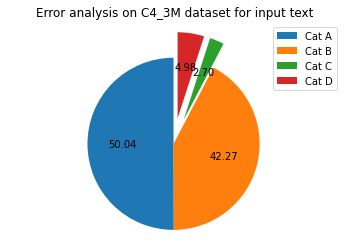

In [ ]:
q=len(df_c4[df_c4['Error_input_text']=='Cat A'])/len(df_c4)*100
w=len(df_c4[df_c4['Error_input_text']=='Cat B'])/len(df_c4)*100
e=len(df_c4[df_c4['Error_input_text']=='Cat C'])/len(df_c4)*100
r=len(df_c4[df_c4['Error_input_text']=='Cat D'])/len(df_c4)*100
k=[q,w,e,r]
labels=['Cat A','Cat B','Cat C','Cat D']
import matplotlib.pyplot as plotter
figureObject, axesObject = plotter.subplots()
explode=[0,0,0.3,0.3]
axesObject.pie(k,
        autopct='%1.2f',
        startangle=90,
        explode=explode,
        )
axesObject.axis('equal')
plotter.title("Error analysis on C4_3M dataset for input text")
plotter.legend(labels)

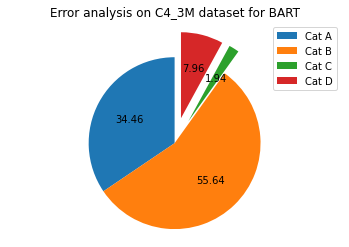

In [ ]:
q=len(df_c4[df_c4['BART_error']=='Cat A'])/len(df_c4)*100
w=len(df_c4[df_c4['BART_error']=='Cat B'])/len(df_c4)*100
e=len(df_c4[df_c4['BART_error']=='Cat C'])/len(df_c4)*100
r=len(df_c4[df_c4['BART_error']=='Cat D'])/len(df_c4)*100
k=[q,w,e,r]
labels=['Cat A','Cat B','Cat C','Cat D']
import matplotlib.pyplot as plotter
figureObject, axesObject = plotter.subplots()
explode=[0,0,0.3,0.3]
axesObject.pie(k,
        autopct='%1.2f',
        startangle=90,
        explode=explode,
        )
axesObject.axis('equal')
plotter.title("Error analysis on C4_3M dataset for BART")
plotter.legend(labels)

In [ ]:
df_c4

,Unnamed: 0,target_text,input_text,MarianMT,BART,target_new,BART_error,Error_Marian_MT,Error_input_text
0,0,Good luck on your new start !,Good luck in our new start !,‚ñÅGood luck in our new start!,Good luck in our new start!,Good luck on your new start!,Cat B,Cat B,Cat B
1,1,My teacher is going to move to change his job .,My teacher is went to moved change his job .,My teacher went to moved to‚ñÅchange his job.,My teacher is went to moved change his job.,My teacher is going to move to change his job.,Cat B,Cat B,Cat B
2,2,He is a so nice guy and taught me English very...,He is a nice guy and teach me English very ki...,He is a nice guy and teach me‚ñÅEnglish very k...,He is a nice guy and teach me English very ki...,He is a so nice guy and taught me English very...,Cat B,Cat B,Cat B
3,3,And he took in my favorite subjects like soccer .,And he take in my favourite subject like socerr .,And he take in my favourite subject like socerr.,And he take in my favourite subject like socerr.,And he took in my favorite subjects like soccer.,Cat D,Cat D,Cat D
4,4,"Actually , he was the one who let me know abou...","Actually , who let me know about Lang uage is ...","Actually,‚ñÅwho let me know about Lang uage is...","Actually, who let me know about Lang uage is he.","Actually, he was the one who let me know about...",Cat D,Cat D,Cat D
...,...,...,...,...,...,...,...,...,...
1037508,1037508,"As the date had been promised at noon , I went...","As the date has been promised in noon , I gone...","As the date has been promised in noon, I gone ...","As the date has been promised at noon, I went ...","As the date had been promised at noon, I went ...",Cat B,Cat B,Cat B
1037509,1037509,11 a . m . and toward the meeting place by sub...,11 a m and toward the meet place by sub way .,11 a m and toward the meet‚ñÅplace by sub way.,11 a m. and toward the meet place by sub way.,11 a. m. and toward the meeting place by subway.,Cat B,Cat B,Cat B
1037510,1037510,"On the way , I got a mail from her .","On the way , I get an mail from her .","On the way, I get an mail from her.","On the way, I got an email from her.","On the way, I got a mail from her.",Cat B,Cat B,Cat B
1037511,1037511,she said she want to change the meeting time t...,"It said , she went to made the meeting time in...","It said, she went to made the meeting time in ...","It said, she went to make the meeting time in ...",she said she want to change the meeting time t...,Cat B,Cat B,Cat B


In [ ]:
df_c4[df_c4["Error_input_text"]=="Cat A"]

,Unnamed: 0,target_text,input_text,MarianMT,BART,target_new,BART_error,Error_Marian_MT,Error_input_text
49,49,"Well , I just proud of myself , yep .","Well , I just proud of myself , yep .","‚ñÅWell, I just proud of myself, yep.","Well, I just proud of myself, yep.","Well, I just proud of myself, yep.",Cat A,Cat B,Cat A
54,54,Whitney Houston Failed,Whitney Houston Failed,‚ñÅWhitney Houston Failed,Whitney Houston Failed,Whitney Houston Failed,Cat A,Cat B,Cat A
56,56,It sounded not bad .,It sounded not bad .,It sounded not bad.,It sounded not bad.,It sounded not bad.,Cat A,Cat A,Cat A
58,58,"And finally , she released a new song !","And finally , she released a new song !","And finally, she released a new song!","And finally, she released a new song!","And finally, she released a new song!",Cat A,Cat A,Cat A
59,59,She came back !,She came back !,She came back!,She came back!,She came back!,Cat A,Cat A,Cat A
...,...,...,...,...,...,...,...,...,...
1037461,1037461,What do I should do ?,What do I should do ?,What do I should do?,What do I should do?,What do I should do?,Cat A,Cat A,Cat A
1037463,1037463,Can you wish me all good wishes ?,Can you wish me all good wishes ?,Can you wish me all good wishes?,Can you wish me all good wishes?,Can you wish me all good wishes?,Cat A,Cat A,Cat A
1037464,1037464,Visit to foreign countries in Japan,Visit to foreign countries in Japan,Visit to foreign countries in Japan,Visit to foreign countries in Japan,Visit to foreign countries in Japan,Cat A,Cat A,Cat A
1037469,1037469,I made appointments to visit to the offices by...,I made appointments to visit to the offices by...,I made appointments to visit the offices by em...,I made appointments to visit the offices by em...,I made appointments to visit to the offices by...,Cat B,Cat B,Cat A


## Cleaning Target text


In [ ]:
df_c4_new=pd.read_csv('/content/drive/MyDrive/Project_document_recognition/Updated_target_BART_MARIAN_INPUT_ERROR.csv')

In [ ]:
df_c4_new


,Unnamed: 0,target_text,input_text,MarianMT,BART,target_new,BART_error,Error_Marian_MT,Error_input_text
0,0,Good luck on your new start !,Good luck in our new start !,‚ñÅGood luck in our new start!,Good luck in our new start!,Good luck on your new start!,Cat B,Cat B,Cat B
1,1,My teacher is going to move to change his job .,My teacher is went to moved change his job .,My teacher went to moved to‚ñÅchange his job.,My teacher is went to moved change his job.,My teacher is going to move to change his job.,Cat B,Cat B,Cat B
2,2,He is a so nice guy and taught me English very...,He is a nice guy and teach me English very ki...,He is a nice guy and teach me‚ñÅEnglish very k...,He is a nice guy and teach me English very ki...,He is a so nice guy and taught me English very...,Cat B,Cat B,Cat B
3,3,And he took in my favorite subjects like soccer .,And he take in my favourite subject like socerr .,And he take in my favourite subject like socerr.,And he take in my favourite subject like socerr.,And he took in my favorite subjects like soccer.,Cat D,Cat D,Cat D
4,4,"Actually , he was the one who let me know abou...","Actually , who let me know about Lang uage is ...","Actually,‚ñÅwho let me know about Lang uage is...","Actually, who let me know about Lang uage is he.","Actually, he was the one who let me know about...",Cat D,Cat D,Cat D
...,...,...,...,...,...,...,...,...,...
1037508,1037508,"As the date had been promised at noon , I went...","As the date has been promised in noon , I gone...","As the date has been promised in noon, I gone ...","As the date has been promised at noon, I went ...","As the date had been promised at noon, I went ...",Cat B,Cat B,Cat B
1037509,1037509,11 a . m . and toward the meeting place by sub...,11 a m and toward the meet place by sub way .,11 a m and toward the meet‚ñÅplace by sub way.,11 a m. and toward the meet place by sub way.,11 a. m. and toward the meeting place by subway.,Cat B,Cat B,Cat B
1037510,1037510,"On the way , I got a mail from her .","On the way , I get an mail from her .","On the way, I get an mail from her.","On the way, I got an email from her.","On the way, I got a mail from her.",Cat B,Cat B,Cat B
1037511,1037511,she said she want to change the meeting time t...,"It said , she went to made the meeting time in...","It said, she went to made the meeting time in ...","It said, she went to make the meeting time in ...",she said she want to change the meeting time t...,Cat B,Cat B,Cat B


In [ ]:
df_c4_new.drop(columns=['Unnamed: 0','target_text','Error_input_text','BART_error','Error_Marian_MT'],axis=1,inplace=True)

In [ ]:
df_c4_new

,input_text,MarianMT,BART,target_new
0,Good luck in our new start !,‚ñÅGood luck in our new start!,Good luck in our new start!,Good luck on your new start!
1,My teacher is went to moved change his job .,My teacher went to moved to‚ñÅchange his job.,My teacher is went to moved change his job.,My teacher is going to move to change his job.
2,He is a nice guy and teach me English very ki...,He is a nice guy and teach me‚ñÅEnglish very k...,He is a nice guy and teach me English very ki...,He is a so nice guy and taught me English very...
3,And he take in my favourite subject like socerr .,And he take in my favourite subject like socerr.,And he take in my favourite subject like socerr.,And he took in my favorite subjects like soccer.
4,"Actually , who let me know about Lang uage is ...","Actually,‚ñÅwho let me know about Lang uage is...","Actually, who let me know about Lang uage is he.","Actually, he was the one who let me know about..."
...,...,...,...,...
1037508,"As the date has been promised in noon , I gone...","As the date has been promised in noon, I gone ...","As the date has been promised at noon, I went ...","As the date had been promised at noon, I went ..."
1037509,11 a m and toward the meet place by sub way .,11 a m and toward the meet‚ñÅplace by sub way.,11 a m. and toward the meet place by sub way.,11 a. m. and toward the meeting place by subway.
1037510,"On the way , I get an mail from her .","On the way, I get an mail from her.","On the way, I got an email from her.","On the way, I got a mail from her."
1037511,"It said , she went to made the meeting time in...","It said, she went to made the meeting time in ...","It said, she went to make the meeting time in ...",she said she want to change the meeting time t...


In [ ]:
df_c4_new=df_c4_new[['target_new','input_text','BART','MarianMT']]

In [ ]:
df_c4_new

,target_new,input_text,BART,MarianMT
0,Good luck on your new start!,Good luck in our new start !,Good luck in our new start!,‚ñÅGood luck in our new start!
1,My teacher is going to move to change his job.,My teacher is went to moved change his job .,My teacher is went to moved change his job.,My teacher went to moved to‚ñÅchange his job.
2,He is a so nice guy and taught me English very...,He is a nice guy and teach me English very ki...,He is a nice guy and teach me English very ki...,He is a nice guy and teach me‚ñÅEnglish very k...
3,And he took in my favorite subjects like soccer.,And he take in my favourite subject like socerr .,And he take in my favourite subject like socerr.,And he take in my favourite subject like socerr.
4,"Actually, he was the one who let me know about...","Actually , who let me know about Lang uage is ...","Actually, who let me know about Lang uage is he.","Actually,‚ñÅwho let me know about Lang uage is..."
...,...,...,...,...
1037508,"As the date had been promised at noon, I went ...","As the date has been promised in noon , I gone...","As the date has been promised at noon, I went ...","As the date has been promised in noon, I gone ..."
1037509,11 a. m. and toward the meeting place by subway.,11 a m and toward the meet place by sub way .,11 a m. and toward the meet place by sub way.,11 a m and toward the meet‚ñÅplace by sub way.
1037510,"On the way, I got a mail from her.","On the way , I get an mail from her .","On the way, I got an email from her.","On the way, I get an mail from her."
1037511,she said she want to change the meeting time t...,"It said , she went to made the meeting time in...","It said, she went to make the meeting time in ...","It said, she went to made the meeting time in ..."


## MarianMT reconstruction


In [ ]:
df_c4_new['MarianMT_new']=[0]*len(df_c4_new)
for i in range(len(df_c4_new)):
  k=df_c4_new['MarianMT'][i]
  #k1=df_c4_new['target_new'][i]
  k=str(k)
  #k1=str(k1)
  n1 = re.sub("‚ñÅ", ' ', k)
  #n2 = re.sub(" n't", "n't", k1)
  #print(i)
  df_c4_new['MarianMT_new'][i]=n1
  #df_c4_new['target_new'][i]=n2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [ ]:
df_c4_new

,target_new,input_text,BART,MarianMT,MarianMT_new
0,Good luck on your new start!,Good luck in our new start !,Good luck in our new start!,‚ñÅGood luck in our new start!,Good luck in our new start!
1,My teacher is going to move to change his job.,My teacher is went to moved change his job .,My teacher is went to moved change his job.,My teacher went to moved to‚ñÅchange his job.,My teacher went to moved to change his job.
2,He is a so nice guy and taught me English very...,He is a nice guy and teach me English very ki...,He is a nice guy and teach me English very ki...,He is a nice guy and teach me‚ñÅEnglish very k...,He is a nice guy and teach me English very kin...
3,And he took in my favorite subjects like soccer.,And he take in my favourite subject like socerr .,And he take in my favourite subject like socerr.,And he take in my favourite subject like socerr.,And he take in my favourite subject like socerr.
4,"Actually, he was the one who let me know about...","Actually , who let me know about Lang uage is ...","Actually, who let me know about Lang uage is he.","Actually,‚ñÅwho let me know about Lang uage is...","Actually, who let me know about Lang uage is he."
...,...,...,...,...,...
1037508,"As the date had been promised at noon, I went ...","As the date has been promised in noon , I gone...","As the date has been promised at noon, I went ...","As the date has been promised in noon, I gone ...","As the date has been promised in noon, I gone ..."
1037509,11 a. m. and toward the meeting place by subway.,11 a m and toward the meet place by sub way .,11 a m. and toward the meet place by sub way.,11 a m and toward the meet‚ñÅplace by sub way.,11 a m and toward the meet place by sub way.
1037510,"On the way, I got a mail from her.","On the way , I get an mail from her .","On the way, I got an email from her.","On the way, I get an mail from her.","On the way, I get an mail from her."
1037511,she said she want to change the meeting time t...,"It said , she went to made the meeting time in...","It said, she went to make the meeting time in ...","It said, she went to made the meeting time in ...","It said, she went to made the meeting time in ..."


##Target text reconstruction by replacing n't

In [ ]:
#df_c4_new['MarianMT_new']=[0]*len(df_c4_new)
for i in range(800000,810000):
  #k=df_c4_new['MarianMT'][i]
  k1=df_c4_new['target_new'][i]
  #k=str(k)
  k1=str(k1)
  #n1 = re.sub("‚ñÅ", ' ', k)
  n2 = re.sub(" n't", "n't", k1)
  print(i)
  #df_c4_new['MarianMT_new'][i]=n1
  df_c4_new['target_new'][i]=n2

In [ ]:
df=df_c4_new[800000:815000]

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df

In [ ]:
df.drop(['index'],axis=1,inplace=True)

In [ ]:
df

##Error category for features


In [ ]:
w=[0]*len(df) #column for inserting type of error
df['Input_error']=w
df['BART_error']=w
df['Error_MarainMT_new']=w

Errortype(df,'target_new','input_text','Input_error')
Errortype(df,'target_new','BART','BART_error')
Errortype(df,'target_new','MarianMT_new','Error_MarainMT_new')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

## Removing corrupted target text

In [ ]:
df_1=df[(df['Input_error']=='Cat A') & (df['BART_error']!='Cat A')]

In [ ]:
df_1

In [ ]:
df_2=df[(df['Input_error']=='Cat A') & (df['Error_MarainMT_new']!='Cat A')]

In [ ]:
df_2

In [ ]:
s=df_2.index

In [ ]:
df.drop(index=np.array(s),axis=0,inplace=True)

In [ ]:
df=df[:10000]

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.drop(['index'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df

,target_new,input_text,BART,MarianMT,MarianMT_new,Input_error,BART_error,Error_MarainMT_new
0,Slow fitness,Slow fitness,Slow fitness,Slow fitness,Slow fitness,Cat A,Cat A,Cat A
1,I visited a national sports club chain store o...,I visited a national chain store sports club o...,I visited a national chain store on business l...,I visited a national chain store sports club o...,I visited a national chain store sports club o...,Cat B,Cat B,Cat B
2,"Recently, slow life is in fashion, such as slo...",Recently slow life is in fashion such as slow ...,"Recently, slow life is in fashion such as slow...",Recently slow life is in fashion such as slow ...,Recently slow life is in fashion such as slow ...,Cat B,Cat B,Cat B
3,The sports club tries to change its image from...,The sports club try to change their self - ima...,The sports club try to change their self - ima...,The sports club try to‚ñÅchange their self - i...,The sports club try to change their self - ima...,Cat B,Cat B,Cat B
4,I think `` Slow fitness `` appeals especially ...,I think `` Slow fitness `` appeals especially ...,I think `` Slow fitness `` appeals especially ...,I think Slow fitness appeals especially to y...,I think Slow fitness appeals especially to y...,Cat A,Cat A,Cat A
...,...,...,...,...,...,...,...,...
9995,"Thus, it could be more fun and I could better ...","Therefore , It would be more fun and I could c...","Therefore, It would be more fun and I could co...","Therefore, It would be more‚ñÅfun and I could‚...","Therefore, It would be more fun and I could co...",Cat B,Cat B,Cat B
9996,"Although I ca n't get a scholarship, because i...",Although I ca n't get a scholarship because it...,Although I can't get a scholarship because it ...,‚ñÅAlthough I can't get a scholarship because ...,Although I can't get a scholarship because it...,Cat B,Cat B,Cat B
9997,"By the time I graduate from the university, I'...",By the time I will graduate from the universit...,By the time I will graduate from the universit...,By the time I will graduate from the universit...,By the time I will graduate from the universit...,Cat B,Cat B,Cat B
9998,: ) There is no one who does n't have their ow...,: ) There is no one who do n't have their own ...,: ) There is no one who doesn't have their own...,: ) There is no one‚ñÅwho don't have their own...,: ) There is no one who don't have their own a...,Cat B,Cat B,Cat B


## BART and MarianMT performance analyis

In [ ]:
q=len(df[df['Input_error']=='Cat A'])/len(df)*100
w=len(df[df['Input_error']=='Cat B'])/len(df)*100
e=len(df[df['Input_error']=='Cat C'])/len(df)*100
r=len(df[df['Input_error']=='Cat D'])/len(df)*100
k=[q,w,e,r]
labels=['Cat A','Cat B','Cat C','Cat D']
import matplotlib.pyplot as plotter
figureObject, axesObject = plotter.subplots()
explode=[0,0,0.3,0.3]
axesObject.pie(k,
        autopct='%1.2f',
        startangle=90,
        explode=explode,
        )
axesObject.axis('equal')
plotter.title("Error analysis on C4_3M dataset for input text")
plotter.legend(labels)

In [ ]:
df=df_c4_new

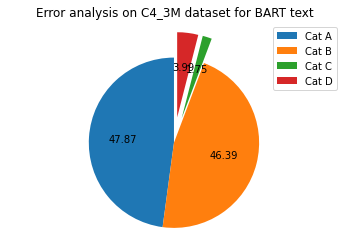

In [ ]:
q=len(df[df['BART_error']=='Cat A'])/len(df)*100
w=len(df[df['BART_error']=='Cat B'])/len(df)*100
e=len(df[df['BART_error']=='Cat C'])/len(df)*100
r=len(df[df['BART_error']=='Cat D'])/len(df)*100
k=[q,w,e,r]
labels=['Cat A','Cat B','Cat C','Cat D']
import matplotlib.pyplot as plotter
figureObject, axesObject = plotter.subplots()
explode=[0,0,0.3,0.3]
axesObject.pie(k,
        autopct='%1.2f',
        startangle=90,
        explode=explode,
        )
axesObject.axis('equal')
plotter.title("Error analysis on C4_3M dataset for BART text")
plotter.legend(labels)

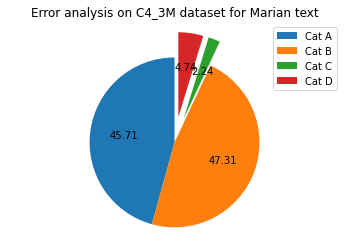

In [ ]:
q=len(df[df['Error_MarainMT_new']=='Cat A'])/len(df)*100
w=len(df[df['Error_MarainMT_new']=='Cat B'])/len(df)*100
e=len(df[df['Error_MarainMT_new']=='Cat C'])/len(df)*100
r=len(df[df['Error_MarainMT_new']=='Cat D'])/len(df)*100
k=[q,w,e,r]
labels=['Cat A','Cat B','Cat C','Cat D']
import matplotlib.pyplot as plotter
figureObject, axesObject = plotter.subplots()
explode=[0,0,0.3,0.3]
axesObject.pie(k,
        autopct='%1.2f',
        startangle=90,
        explode=explode,
        )
axesObject.axis('equal')
plotter.title("Error analysis on C4_3M dataset for Marian text")
plotter.legend(labels)

In [ ]:
df.to_csv("Updated_10k.csv")

# NEW DATA!!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
nd=pd.read_csv('/content/drive/MyDrive/Project_document_recognition/NEW_DATA - Sheet1.csv')

In [ ]:
nd_1=pd.read_csv('/content/drive/MyDrive/Project_document_recognition/NEW_DATA_TEST - Sheet1.csv')

In [ ]:
nd

,TARGET,INPUT,BART,MARIANMT
0,Theatre,Theatre,Theatre,Theatre
1,"Today, I'll go to the theatre with my boyfriend.","Today , I 'll go to the theatre with my boyfri...","Today, I 'll go to the theatre with my boyfriend.","Today, I 'll go to the theatre with my boyfriend."
2,I'm really looking forward to it.,I 'm really looking forward to it .,I'm really looking forward to it.,I'm really looking forward to it.
3,I like Verdi.,I like Verdi .,I like Verdi.,I like Verdi.
4,So it's something special for me.,So it 's something special for me .,So it's something special for me.,So it's something special for me.
...,...,...,...,...
19494,a Japanese girl.,Japanese girl .,Japanese girl.,Japanese girl.
19495,I'm an aged care worker.,I 'm aged care worker .,I'm an aged care worker.,I'm aged care worker.
19496,"My job is really hard, but it does n't pay ver...","My job is really hard , but salary is really c...","My job is really hard, but salary is really ch...","My job is really hard, but salary is really ch..."
19497,I don't like my job. though..,I do n't like my job . though . .,I don't like my job..,I don't like my job. though..


In [ ]:
nd_1.drop(columns=['Unnamed: 4'], axis=1, inplace=True)

In [ ]:
nd_1

,TARGET,INPUT,BART,MARIANMT
0,Theatre,Theatre,Theatre,Theatre
1,"Today, I'll go to the theatre with my boyfriend.","Today , I 'll go to the theatre with my boyfri...","Today, I 'll go to the theatre with my boyfriend.","Today, I 'll go to the theatre with my boyfriend."
2,I'm really looking forward to it.,I 'm really looking forward to it .,I'm really looking forward to it.,I'm really looking forward to it.
3,I like Verdi.,I like Verdi .,I like Verdi.,I like Verdi.
4,So it's something special for me.,So it 's something special for me .,So it's something special for me.,So it's something special for me.
...,...,...,...,...
19494,a Japanese girl.,Japanese girl .,Japanese girl.,Japanese girl.
19495,I'm an aged care worker.,I 'm aged care worker .,I'm an aged care worker.,I'm aged care worker.
19496,"My job is really hard, but it does n't pay ver...","My job is really hard , but salary is really c...","My job is really hard, but salary is really ch...","My job is really hard, but salary is really ch..."
19497,I don't like my job. though..,I do n't like my job . though . .,I don't like my job..,I don't like my job. though..


In [ ]:
nd['TARGET'][2]

"I'm really looking forward to it."

In [ ]:
nd_new = pd.DataFrame(columns=['TARGET','INPUT','BART','MARIANMT'])

In [ ]:
nd_new

,TARGET,INPUT,BART,MARIANMT


In [ ]:
for i in range(len(nd)):
  if nd['TARGET'][i]==nd_1['TARGET'][i]:
    nd_new=nd_new.append(nd.iloc[i],ignore_index=True)

In [ ]:
nd_new

,TARGET,INPUT,BART,MARIANMT
0,Theatre,Theatre,Theatre,Theatre
1,"Today, I'll go to the theatre with my boyfriend.","Today , I 'll go to the theatre with my boyfri...","Today, I 'll go to the theatre with my boyfriend.","Today, I 'll go to the theatre with my boyfriend."
2,I'm really looking forward to it.,I 'm really looking forward to it .,I'm really looking forward to it.,I'm really looking forward to it.
3,I like Verdi.,I like Verdi .,I like Verdi.,I like Verdi.
4,So it's something special for me.,So it 's something special for me .,So it's something special for me.,So it's something special for me.
...,...,...,...,...
17153,a Japanese girl.,Japanese girl .,Japanese girl.,Japanese girl.
17154,I'm an aged care worker.,I 'm aged care worker .,I'm an aged care worker.,I'm aged care worker.
17155,"My job is really hard, but it does n't pay ver...","My job is really hard , but salary is really c...","My job is really hard, but salary is really ch...","My job is really hard, but salary is really ch..."
17156,I don't like my job. though..,I do n't like my job . though . .,I don't like my job..,I don't like my job. though..


In [ ]:
nd_new.to_csv('freshdata_17k.csv')

In [ ]:
nd_new

In [ ]:
nd_new['target_new']=[0]*len(nd_new)
for i in range(len(nd_new['TARGET'][0:len(nd_new)])):
  k=nd_new['TARGET'][i]
  k=str(k)
  n1 = re.sub(' !', '!', k)
  n2 = re.sub(' ,', ',', n1)
  n3 = re.sub(' \.', '.', n2)
  n4 = re.sub(' \?', '?', n3)
  n5 = re.sub(' \'', '\'', n4)
  nd_new['target_new'][i]=n5

<ipython-input-50-7f754d1e4b83>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nd_new['target_new'][i]=n5
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
nd_new_1=nd_new[['target_new','INPUT','BART','MARIANMT']]

In [ ]:
nd_new_1

,target_new,INPUT,BART,MARIANMT
0,Theatre,Theatre,Theatre,Theatre
1,"Today, I'll go to the theatre with my boyfriend.","Today , I 'll go to the theatre with my boyfri...","Today, I 'll go to the theatre with my boyfriend.","Today, I 'll go to the theatre with my boyfriend."
2,I'm really looking forward to it.,I 'm really looking forward to it .,I'm really looking forward to it.,I'm really looking forward to it.
3,I like Verdi.,I like Verdi .,I like Verdi.,I like Verdi.
4,So it's something special for me.,So it 's something special for me .,So it's something special for me.,So it's something special for me.
...,...,...,...,...
17153,a Japanese girl.,Japanese girl .,Japanese girl.,Japanese girl.
17154,I'm an aged care worker.,I 'm aged care worker .,I'm an aged care worker.,I'm aged care worker.
17155,"My job is really hard, but it does n't pay ver...","My job is really hard , but salary is really c...","My job is really hard, but salary is really ch...","My job is really hard, but salary is really ch..."
17156,I don't like my job. though..,I do n't like my job . though . .,I don't like my job..,I don't like my job. though..


In [ ]:
for i in range(len(nd_new_1)):
  k1=nd_new_1['target_new'][i]
  k1=str(k1)
  n2 = re.sub(" n't", "n't", k1)
  nd_new_1['target_new'][i]=n2

<ipython-input-61-bd9409628cf3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nd_new_1['target_new'][i]=n2


In [ ]:
nd_new_1

,target_new,INPUT,BART,MARIANMT
0,Theatre,Theatre,Theatre,Theatre
1,"Today, I'll go to the theatre with my boyfriend.","Today , I 'll go to the theatre with my boyfri...","Today, I 'll go to the theatre with my boyfriend.","Today, I 'll go to the theatre with my boyfriend."
2,I'm really looking forward to it.,I 'm really looking forward to it .,I'm really looking forward to it.,I'm really looking forward to it.
3,I like Verdi.,I like Verdi .,I like Verdi.,I like Verdi.
4,So it's something special for me.,So it 's something special for me .,So it's something special for me.,So it's something special for me.
...,...,...,...,...
17153,a Japanese girl.,Japanese girl .,Japanese girl.,Japanese girl.
17154,I'm an aged care worker.,I 'm aged care worker .,I'm an aged care worker.,I'm aged care worker.
17155,"My job is really hard, but it doesn't pay very...","My job is really hard , but salary is really c...","My job is really hard, but salary is really ch...","My job is really hard, but salary is really ch..."
17156,I don't like my job. though..,I do n't like my job . though . .,I don't like my job..,I don't like my job. though..


In [ ]:
nd_new_1.to_csv('freshdata_17k_Tagetclean.csv')

In [ ]:
nd_new_1['Input_error']=[0]*len(nd_new_1)
nd_new_1['BART_error']=[0]*len(nd_new_1)
nd_new_1['MarianMT_error']=[0]*len(nd_new_1)
Errortype(nd_new_1,'target_new','INPUT','Input_error')
Errortype(nd_new_1,'target_new','BART','BART_error')
Errortype(nd_new_1,'target_new','MARIANMT','MarianMT_error')

<ipython-input-65-b7b36fd08a91>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c4[z][i]='Cat A' #no error
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
nd_new_1.to_csv('freshdata_17k_Tagetclean_errorscats.csv')

In [ ]:
df

,target_new,INPUT,BART,MARIANMT,BART_error,Input_error,marianMT_error
0,Theatre,Theatre,Theatre,Theatre,Cat A,Cat A,Cat A
1,"Today, I'll go to the theatre with my boyfriend.","Today , I 'll go to the theatre with my boyfri...","Today, I 'll go to the theatre with my boyfriend.","Today, I 'll go to the theatre with my boyfriend.",Cat A,Cat A,Cat A
2,I'm really looking forward to it.,I 'm really looking forward to it .,I'm really looking forward to it.,I'm really looking forward to it.,Cat A,Cat A,Cat A
3,I like Verdi.,I like Verdi .,I like Verdi.,I like Verdi.,Cat A,Cat A,Cat A
4,So it's something special for me.,So it 's something special for me .,So it's something special for me.,So it's something special for me.,Cat A,Cat A,Cat A
...,...,...,...,...,...,...,...
27153,"Thus, it could be more fun and I could better ...","Therefore , It would be more fun and I could c...","Therefore, It would be more fun and I could co...","Therefore, It would be more fun and I could co...",Cat B,Cat B,Cat B
27154,"Although I ca n't get a scholarship, because i...",Although I ca n't get a scholarship because it...,Although I can't get a scholarship because it ...,Although I can't get a scholarship because it...,Cat B,Cat B,Cat B
27155,"By the time I graduate from the university, I'...",By the time I will graduate from the universit...,By the time I will graduate from the universit...,By the time I will graduate from the universit...,Cat B,Cat B,Cat B
27156,: ) There is no one who does n't have their ow...,: ) There is no one who do n't have their own ...,: ) There is no one who doesn't have their own...,: ) There is no one who don't have their own a...,Cat B,Cat B,Cat B


In [ ]:
count=0
for i in range(len(df)):
  if df['Input_error'][i]=='Cat A' and df['marianMT_error'][i]=='Cat A':
    count+=1

In [ ]:
count


In [ ]:
nd_new=pd.read_csv('/content/testing - Sheet1.csv')

In [ ]:
for i in range(len(nd_new['MARIANMT'][0:len(nd_new)])):
  k=nd_new['MARIANMT'][i]
  k=str(k)
  n1 = re.sub(' !', '!', k)
  n2 = re.sub(' ,', ',', n1)
  n3 = re.sub(' \.', '.', n2)
  n4 = re.sub(' \?', '?', n3)
  n5 = re.sub(' \'', '\'', n4)
  nd_new['MARIANMT'][i]=n5

In [ ]:
nd_new_1=nd_new

In [ ]:
nd_new_1['Input_error']=[0]*len(nd_new_1)
nd_new_1['BART_error']=[0]*len(nd_new_1)
nd_new_1['MarianMT_error']=[0]*len(nd_new_1)
Errortype(nd_new_1,'target_new','INPUT','Input_error')
Errortype(nd_new_1,'target_new','BART','BART_error')
Errortype(nd_new_1,'target_new','MARIANMT','MarianMT_error')

<ipython-input-10-219a65c0200a>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c4[z][i]='Cat A' #no error
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
nd_new=nd_new_1

In [ ]:
nd_new_1.to_csv("final.csv")

In [ ]:
nd_new_1=pd.read_csv('final.csv')

In [ ]:
for i in range(len(nd_new_1['target_new'][0:len(nd_new_1)])):
  k=nd_new_1['target_new'][i]
  k=str(k)
  for j in range(len(k)-1):
      if k[j]=='.' or k[j]=='-':
        if k[j+1]=='.' or k[j+1]=='-':
          df=df.append(nd_new_1.iloc[[i],:])
  if len(k)<4:
    df=df.append(nd_new_1.iloc[[i],:])






In [ ]:
df

,target_new,INPUT,BART,MARIANMT,BART_error,Input_error,marianMT_error,MarianMT_error
23,Hi.,Hi.,Hi.,Hi.,Cat A,Cat A,Cat A,Cat A
50,Ps.,Ps.,Ps.,Ps.,Cat A,Cat A,Cat A,Cat A
58,!!,!!,!!,!!,Cat A,Cat A,Cat A,Cat A
68,"By doing that, children are formed into differ...","By doing that, children are formed into differ...","By doing that, children are formed into differ...","By doing that, children are formed into differ...",Cat A,Cat A,Cat B,Cat B
68,"By doing that, children are formed into differ...","By doing that, children are formed into differ...","By doing that, children are formed into differ...","By doing that, children are formed into differ...",Cat A,Cat A,Cat B,Cat B
...,...,...,...,...,...,...,...,...
27111,8,8,8,8,Cat A,Cat A,Cat A,Cat A
27146,My summer vacation is almost over and...,My summer vacation is almost over and...,My summer vacation is almost over...,My summer vacation is almost over and...,Cat B,Cat A,Cat A,Cat A
27146,My summer vacation is almost over and...,My summer vacation is almost over and...,My summer vacation is almost over...,My summer vacation is almost over and...,Cat B,Cat A,Cat A,Cat A
27149,"I will be busy preparing my thesis, studying f...","I will be busy preparing my thesis, studying f...","I will be busy preparing my thesis, studying f...","I will be busy preparing my thesis, studying f...",Cat B,Cat B,Cat B,Cat B


In [ ]:
nd_new_1.drop(list(df.index.unique()),axis=0,inplace=True)

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Project_document_recognition/Cleaned_data_phase_2 - Sheet1.csv')

In [ ]:
df

,Unnamed: 0,target_new,INPUT,BART,MARIANMT
0,0,Theatre,Theatre,Theatre,Theatre
1,1,"Today, I'll go to the theatre with my boyfriend.","Today, I'll go to the theatre with my boyfriend.","Today, I'll go to the theatre with my boyfriend.","Today, I'll go to the theatre with my boyfriend."
2,2,I'm really looking forward to it.,I'm really looking forward to it.,I'm really looking forward to it.,I'm really looking forward to it.
3,3,I like Verdi.,I like Verdi.,I like Verdi.,I like Verdi.
4,4,So it's something special for me.,So it's something special for me.,So it's something special for me.,So it's something special for me.
...,...,...,...,...,...
25733,25734,"Thus, it could be more fun and I could better ...","Therefore, It would be more fun and I could co...","Therefore, It would be more fun and I could co...","Therefore, It would be more fun and I could co..."
25734,25735,"Although I ca n't get a scholarship, because i...",Although I ca n't get a scholarship because it...,Although I can't get a scholarship because it ...,Although I can't get a scholarship because it ...
25735,25736,"By the time I graduate from the university, I'...",By the time I will graduate from the universit...,By the time I will graduate from the universit...,By the time I will graduate from the universit...
25736,25737,: ) There is no one who does n't have their ow...,: ) There is no one who do n't have their own ...,: ) There is no one who doesn't have their own...,: ) There is no one who don't have their own a...


In [ ]:
df['Input_natural_new_bart']=[0]*len(df)

In [ ]:
count=0
for i in range(len(df['target_new'])):
 t=len(df['INPUT'][i].split())-len(df['target_new'][i].split())
 if t==0:
   k=df['target_new'][i].split()
   k.reverse()
   k1=df['INPUT'][i].split()
   k1.reverse()
   for j in range(len(k)):
     if k[j]==k1[j]:
       continue
     else:
       k[j]=k1[j]
       break

   k.reverse()
   df['Input_natural_new_bart'][i]=' '.join(k)

 else:
    df['Input_natural_new_bart'][i]=df['INPUT'][i]

<ipython-input-23-9afe8a7665d1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Input_natural_new_bart'][i]=' '.join(k)


In [ ]:
df.to_csv('Natural_error_new.csv')

In [ ]:
df

,Unnamed: 0,target_new,INPUT,BART,MARIANMT,Input_natural_new_bart
0,0,Theatre,Theatre,Theatre,Theatre,Theatre
1,1,"Today, I'll go to the theatre with my boyfriend.","Today, I'll go to the theatre with my boyfriend.","Today, I'll go to the theatre with my boyfriend.","Today, I'll go to the theatre with my boyfriend.","Today, I'll go to the theatre with my boyfriend."
2,2,I'm really looking forward to it.,I'm really looking forward to it.,I'm really looking forward to it.,I'm really looking forward to it.,I'm really looking forward to it.
3,3,I like Verdi.,I like Verdi.,I like Verdi.,I like Verdi.,I like Verdi.
4,4,So it's something special for me.,So it's something special for me.,So it's something special for me.,So it's something special for me.,So it's something special for me.
...,...,...,...,...,...,...
25733,25734,"Thus, it could be more fun and I could better ...","Therefore, It would be more fun and I could co...","Therefore, It would be more fun and I could co...","Therefore, It would be more fun and I could co...","Therefore, It would be more fun and I could co..."
25734,25735,"Although I ca n't get a scholarship, because i...",Although I ca n't get a scholarship because it...,Although I can't get a scholarship because it ...,Although I can't get a scholarship because it ...,Although I ca n't get a scholarship because it...
25735,25736,"By the time I graduate from the university, I'...",By the time I will graduate from the universit...,By the time I will graduate from the universit...,By the time I will graduate from the universit...,By the time I will graduate from the universit...
25736,25737,: ) There is no one who does n't have their ow...,: ) There is no one who do n't have their own ...,: ) There is no one who doesn't have their own...,: ) There is no one who don't have their own a...,: ) There is no one who do n't have their own ...


In [ ]:
model_args = Seq2SeqArgs()
model_args.num_train_epochs = 2
model_args.num_beams= 5
model_args.max_length = 120
model_args.train_batch_size= 10
model_args.eval_batch_size=10
model_args.test_batch_size=10
model_args.evaluate_during_training_verbose = True
model_args.output_dir='C:\BART2'
model_args.overwrite_output_dir = False
model_args.save_eval_checkpoints=True
model_args.save_model_every_epoch= True
model_args.use_multiprocessing = False
model_args.save_steps= 30000

model_bart = Seq2SeqModel(
    encoder_decoder_type="bart",
    encoder_decoder_name="C:\BART2\checkpoint-140000-epoch-2",
    args= model_args,
    use_cuda=True,
)


predictions = model_bart.predict(to_predict = df_1['target_2'].to_list())
df_1['predictions_2_mt']=[0]*len(df_1)
df_1['predictions_2_mt']=predictions

In [ ]:
t='Rohit  '

In [ ]:
t.split()

['Rohit']

In [ ]:
t='rohit'

In [ ]:
t=t+' '*abs(6)

In [ ]:
len(t)

11

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Project_document_recognition/Input0_11.csv")

In [ ]:
def error(df,k,v,t):
 df[v]=[0]*len(df)
 characters = string.ascii_letters + string.digits + string.punctuation
 seed(1)
 t=t/100
 for o in range(len(df[k])):
  n=[]
  w=[]
  i=df[k][o]
  for j in range(len(i)):
   if i[j]!=' ':
    n.append(j)
  while len(w)<(t*len(n)):
   w=list(w)
   w.append(random.choice(n))
   w=set(w)

  w=list(w)
  p=list(i)
  for q in w:
   p[q]=random.choice(characters)
  h="".join(p)
  df[v][o]=h




In [ ]:
df['Input_zero']=[0]*len(df)
df['Input_11']=[0]*len(df)
error(df,'target_new','Input_zero',0)
error(df,'target_new','Input_11',11)
#df.to_csv('/content/drive/MyDrive/Project_document_recognition/Target_with_error_updated_1.csv')


<ipython-input-3-fb63b80cad95>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[v][o]=h


In [ ]:
df.drop(['Input_0'],axis=1,inplace=True)

In [ ]:
df.to_csv('/content/drive/MyDrive/Project_document_recognition/Target_with_error_updated_11_0.csv')

In [ ]:
df.to_csv('Target_with_error.csv')

In [ ]:
i=df_c4_1['INPUT'][1]

In [ ]:
i

"Today, I'll go to the theatre with my boyfriend."

In [ ]:
w

[1, 2, 4, 9, 12, 13]

In [ ]:
n

[0, 1, 2, 3, 4, 6, 7, 9, 11, 12, 13, 14]

In [ ]:
h

'Roiit is a hGro'